In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
import glob
import cv2
import keras as k
import matplotlib as mpl
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras.models import model_from_json
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
mpl.rcParams['axes.titlesize'] = 8
import h5py
import os

In [8]:
fruit_images = []
labels = [] 
for fruit_dir_path in glob.glob("D:\\majorProject\\ANN\\dataset\\train\\*"):
    fruit_label = fruit_dir_path.split("\\")[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.png")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (110, 110))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
        fruit_images.append(image)
        labels.append(fruit_label)
fruit_images = np.array(fruit_images)
labels = np.array(labels)

In [9]:
label_to_id_dict = {v:i for i,v in enumerate(np.unique(labels))}
id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}
id_to_label_dict
label_ids = np.array([label_to_id_dict[x] for x in labels])
fruit_images.shape, label_ids.shape, labels.shape

((10901, 110, 110, 3), (10901,), (10901,))

In [10]:
validation_fruit_images = []
validation_labels = [] 
for fruit_dir_path in glob.glob("D:\\majorProject\\ANN\\dataset\\test\\*"):
    fruit_label = fruit_dir_path.split("\\")[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.png")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (110, 110))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        validation_fruit_images.append(image)
        validation_labels.append(fruit_label)
validation_fruit_images = np.array(validation_fruit_images)
validation_labels = np.array(validation_labels)

validation_fruit_images.shape
label_to_id_dict = {v:i for i,v in enumerate(np.unique(validation_labels))}
id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}

validation_label_ids = np.array([label_to_id_dict[x] for x in validation_labels])

In [11]:
X_train, X_test = fruit_images, validation_fruit_images
Y_train, Y_test = label_ids, validation_label_ids

X_train = X_train/255
X_test = X_test/255

X_flat_train = X_train.reshape(X_train.shape[0], 110*110*3)
X_flat_test = X_test.reshape(X_test.shape[0], 110*110*3)

Y_train = keras.utils.to_categorical(Y_train, 60)
Y_test = keras.utils.to_categorical(Y_test, 60)

print('Original Sizes:', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
print('Flattened:', X_flat_train.shape, X_flat_test.shape)

Original Sizes: (10901, 110, 110, 3) (2698, 110, 110, 3) (10901, 60) (2698, 60)
Flattened: (10901, 36300) (2698, 36300)


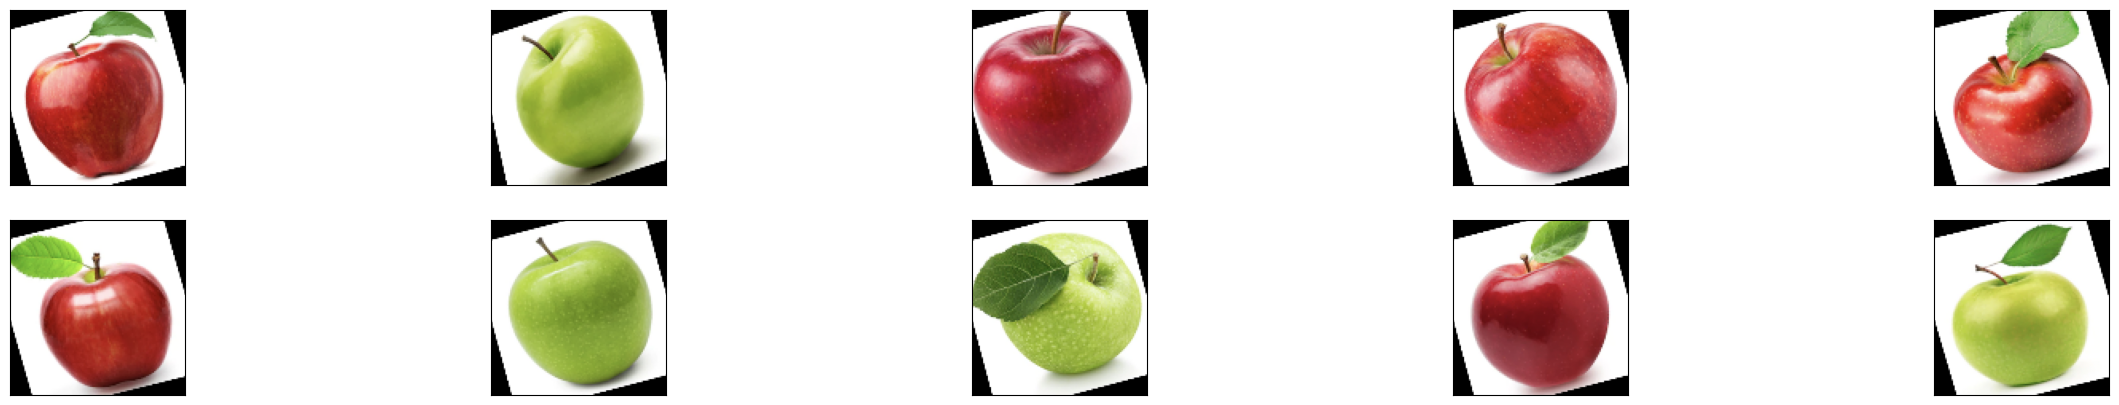

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(X_train[i]))

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop, SGD

model = Sequential()
# Add dense layers to create a fully connected MLP
# Note that we specify an input shape for the first layer, but only the first layer.
# Relu is the activation function used
model.add(Dense(256, activation='relu', input_shape=(X_flat_train.shape[1],)))
# Dropout layers remove features and fight overfitting
model.add(Dropout(0.05))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.05))
# End with a number of units equal to the number of classes we have for our outcome
model.add(Dense(60, activation='softmax'))

model.summary()

# Compile the model to put it all together.
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history_deep = model.fit(X_flat_train, Y_train,
                          batch_size=50,
                          epochs=30,
                          verbose=1,
                          validation_data=(X_flat_test, Y_test))
score = model.evaluate(X_flat_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

C:\Users\sahil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │     9,293,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 60)             │         7,740 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,383,228 (35.79 MB)

 Trainable params: 9,383,228 (35.79 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 23s 91ms/step - accuracy: 0.2359 - loss: 4.0302 - val_accuracy: 0.3073 - val_loss: 2.0824
Epoch 2/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.4504 - loss: 1.3454 - val_accuracy: 0.4711 - val_loss: 1.2793
Epoch 3/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 18s 81ms/step - accuracy: 0.5550 - loss: 1.1089 - val_accuracy: 0.5156 - val_loss: 1.1505
Epoch 4/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 16s 74ms/step - accuracy: 0.6367 - loss: 0.9443 - val_accuracy: 0.4270 - val_loss: 1.6583
Epoch 5/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 16s 73ms/step - accuracy: 0.6639 - loss: 0.8833 - val_accuracy: 0.6523 - val_loss: 0.9633
Epoch 6/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 16s 73ms/step - accuracy: 0.7041 - loss: 0.8084 - val_accuracy: 0.5641 - val_loss: 1.1734
Epoch 7/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 16s 73ms/step - accuracy: 0.7338 - loss: 0.7335 - val_accuracy: 0.7472 - val_loss: 0.6976
Epoch 8/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 16s 73ms/step - accuracy: 0.7561 - loss: 0.6814 - 

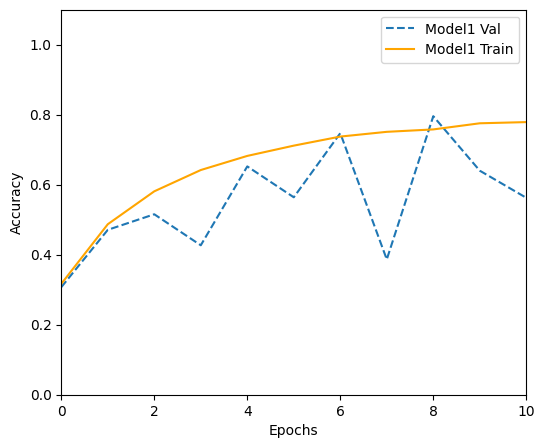

In [14]:
def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(6,5))
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color='orange',
             label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

  #plt.xlim([0,max(history.epoch)])
    plt.xlim([0,10])
    plt.ylim([0,1.1])

plot_history([('model1', history_deep)])

In [15]:
model.save('ANN.keras')